# use vgg to recoginize cat

In [2]:
import scipy.io
import numpy as np 
import os 
import scipy.misc 
import matplotlib.pyplot as plt 
import tensorflow as tf
%matplotlib inline  
print ("Packages loaded")

Packages loaded


In [3]:
def net(data_path, input_image):
    layers = (
        'conv1_1', 'relu1_1', 'conv1_2', 'relu1_2', 'pool1',
        'conv2_1', 'relu2_1', 'conv2_2', 'relu2_2', 'pool2',
        'conv3_1', 'relu3_1', 'conv3_2', 'relu3_2', 'conv3_3',
        'relu3_3', 'conv3_4', 'relu3_4', 'pool3',
        'conv4_1', 'relu4_1', 'conv4_2', 'relu4_2', 'conv4_3',
        'relu4_3', 'conv4_4', 'relu4_4', 'pool4',
        'conv5_1', 'relu5_1', 'conv5_2', 'relu5_2', 'conv5_3',
        'relu5_3', 'conv5_4', 'relu5_4'
    )
    data = scipy.io.loadmat(data_path)
    mean = data['normalization'][0][0][0]
    mean_pixel = np.mean(mean, axis=(0, 1))
    weights = data['layers'][0]
    net = {}
    current = input_image
    for i, name in enumerate(layers):
        kind = name[:4]
        if kind == 'conv':
            kernels, bias = weights[i][0][0][0][0]
            # matconvnet: weights are [width, height, in_channels, out_channels]
            # tensorflow: weights are [height, width, in_channels, out_channels]
            kernels = np.transpose(kernels, (1, 0, 2, 3))
            bias = bias.reshape(-1)
            current = _conv_layer(current, kernels, bias)
        elif kind == 'relu':
            current = tf.nn.relu(current)
        elif kind == 'pool':
            current = _pool_layer(current)
        net[name] = current
    assert len(net) == len(layers)
    return net, mean_pixel, layers
print ("Network for VGG ready")

Network for VGG ready


In [4]:
# define the functions

def _conv_layer(input, weights, bias):
    conv = tf.nn.conv2d(input, tf.constant(weights), strides=(1, 1, 1, 1),
            padding='SAME')
    return tf.nn.bias_add(conv, bias)
def _pool_layer(input):
    return tf.nn.max_pool(input, ksize=(1, 2, 2, 1), strides=(1, 2, 2, 1),
            padding='SAME')
def preprocess(image, mean_pixel):
    return image - mean_pixel
def unprocess(image, mean_pixel):
    return image + mean_pixel
def imread(path):
    return scipy.misc.imread(path).astype(np.float)
def imsave(path, img):
    img = np.clip(img, 0, 255).astype(np.uint8)
    scipy.misc.imsave(path, img)
print ("Functions for VGG ready")


Functions for VGG ready


In [10]:
# load the training and testing images&labels
cwd = os.getcwd()
loadpath = cwd + "/data4vgg.npz"
l = np.load(loadpath)

# Show Files
print (l.files)

['trainlabel', 'trainimg', 'testimg', 'testlabel']


In [11]:
# parse data
trainimg   = l['trainimg']
trainlabel = l['trainlabel']
testimg    = l['testimg']
testlabel  = l['testlabel']
ntrain     = trainimg.shape[0]
nclass     = trainlabel.shape[1]
dim        = trainimg.shape[1]
ntest      = testimg.shape[0]

print ("%d train images loaded" % (ntrain))
print ("%d test images loaded"  % (ntest))
print ("%d dimensional input"   % (dim))
print ("%d classes"             % (nclass))
print ("shape of 'trainimg' is %s" % (trainimg.shape,))
print ("shape of 'testimg' is %s" % (testimg.shape,))

69 train images loaded
18 test images loaded
37632 dimensional input
2 classes
shape of 'trainimg' is (69, 37632)
shape of 'testimg' is (18, 37632)


(1, 1280, 960, 3)
[1/36] conv1_1
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 1280, 960, 64)


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


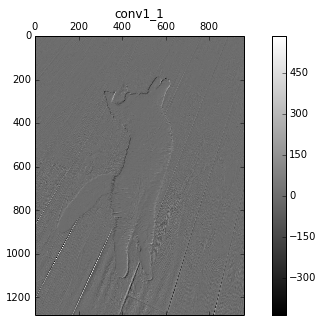

[2/36] relu1_1
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 1280, 960, 64)


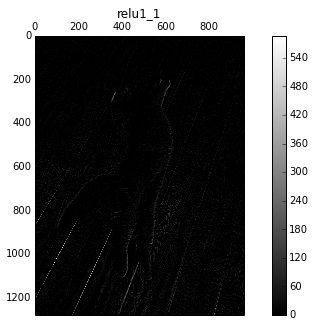

[3/36] conv1_2
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 1280, 960, 64)


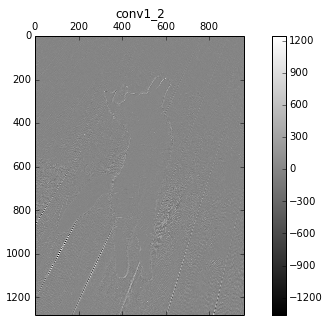

[4/36] relu1_2
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 1280, 960, 64)


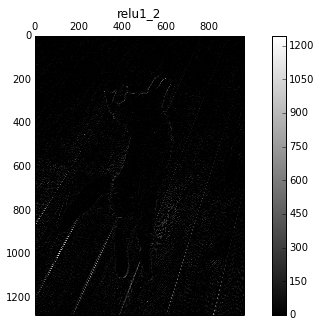

[5/36] pool1
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 640, 480, 64)


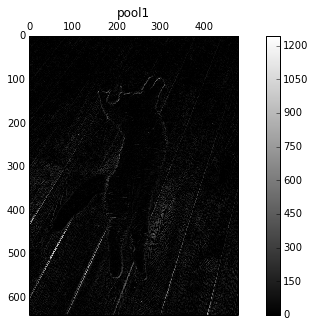

[6/36] conv2_1
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 640, 480, 128)


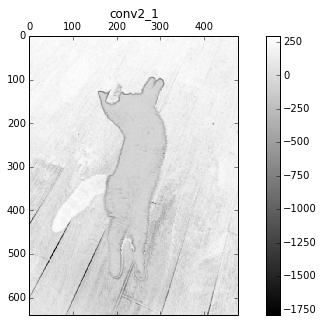

[7/36] relu2_1
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 640, 480, 128)


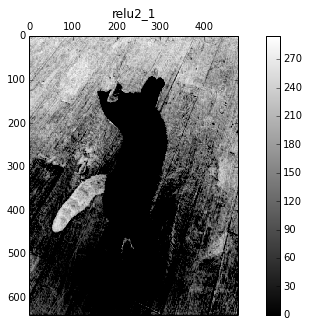

[8/36] conv2_2
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 640, 480, 128)


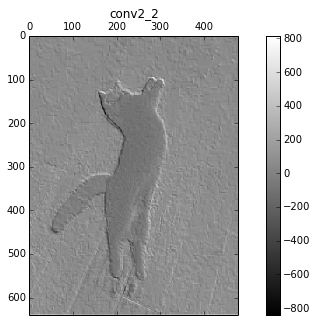

[9/36] relu2_2
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 640, 480, 128)


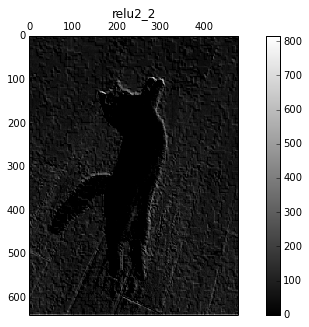

[10/36] pool2
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 320, 240, 128)


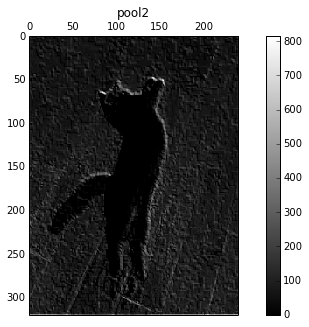

[11/36] conv3_1
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 320, 240, 256)


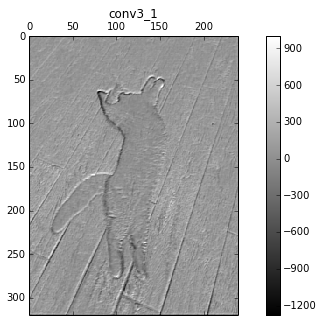

[12/36] relu3_1
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 320, 240, 256)


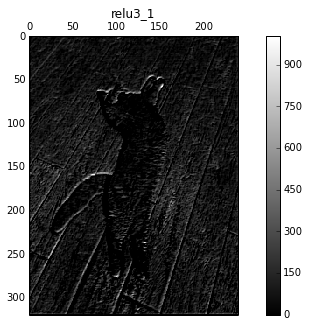

[13/36] conv3_2
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 320, 240, 256)


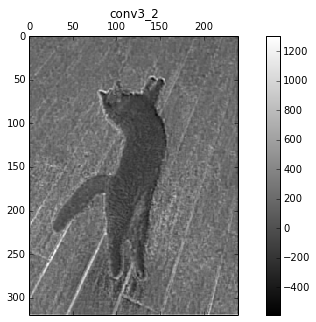

[14/36] relu3_2
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 320, 240, 256)


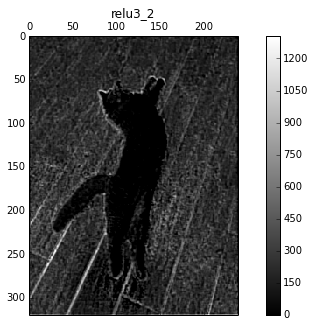

[15/36] conv3_3
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 320, 240, 256)


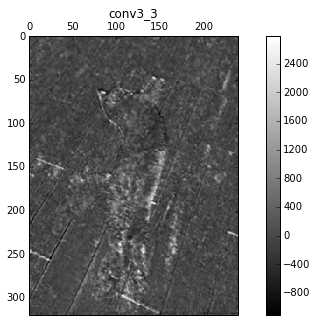

[16/36] relu3_3
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 320, 240, 256)


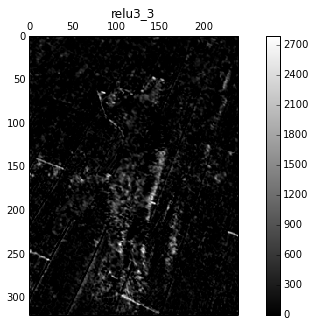

[17/36] conv3_4
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 320, 240, 256)


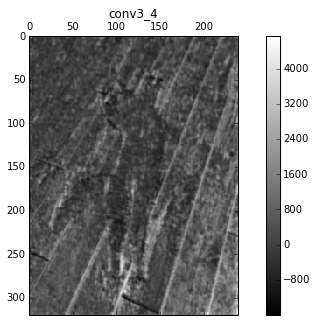

[18/36] relu3_4
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 320, 240, 256)


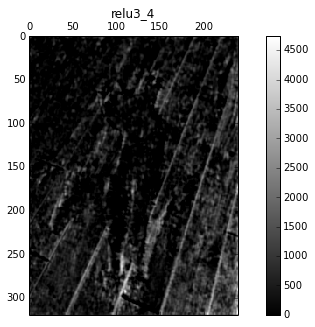

[19/36] pool3
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 160, 120, 256)


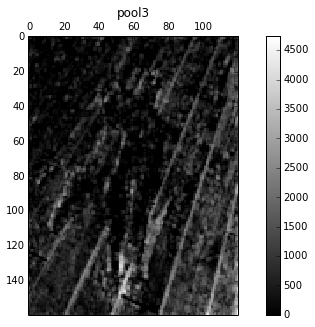

[20/36] conv4_1
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 160, 120, 512)


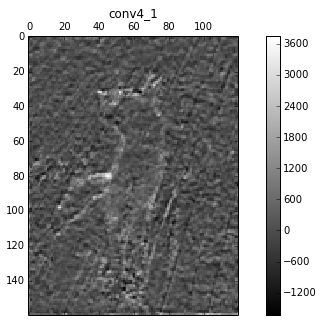

[21/36] relu4_1
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 160, 120, 512)


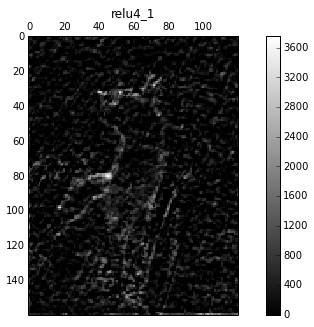

[22/36] conv4_2
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 160, 120, 512)


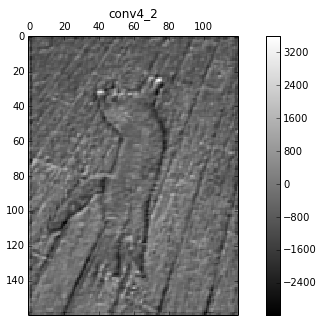

[23/36] relu4_2
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 160, 120, 512)


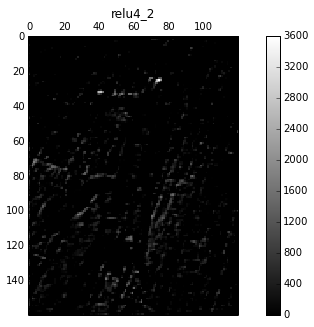

[24/36] conv4_3
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 160, 120, 512)


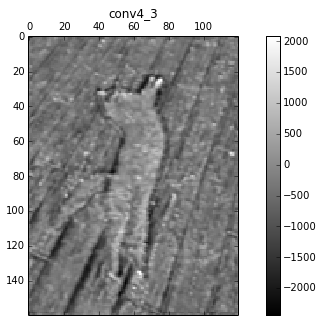

[25/36] relu4_3
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 160, 120, 512)


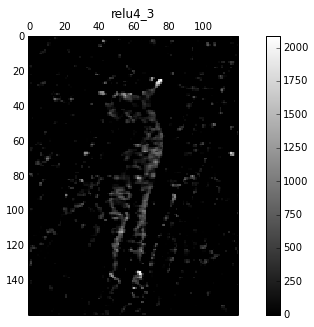

[26/36] conv4_4
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 160, 120, 512)


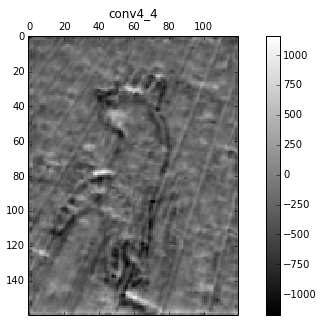

[27/36] relu4_4
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 160, 120, 512)


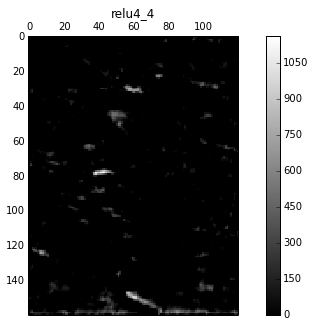

[28/36] pool4
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 80, 60, 512)


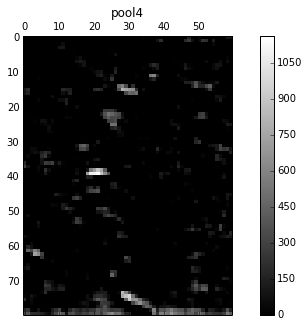

[29/36] conv5_1
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 80, 60, 512)


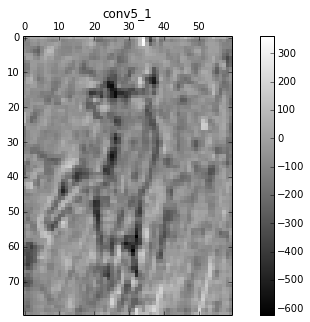

[30/36] relu5_1
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 80, 60, 512)


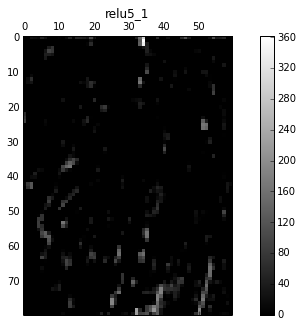

[31/36] conv5_2
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 80, 60, 512)


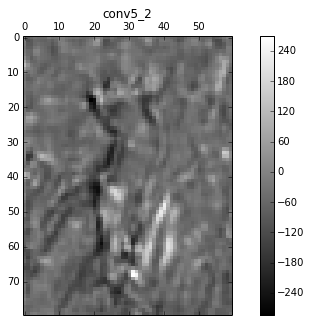

[32/36] relu5_2
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 80, 60, 512)


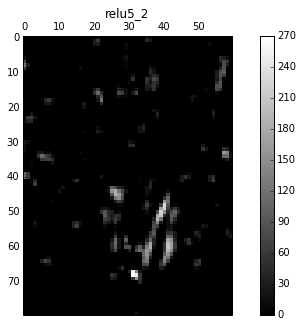

[33/36] conv5_3
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 80, 60, 512)


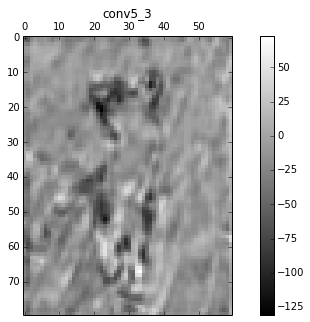

[34/36] relu5_3
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 80, 60, 512)


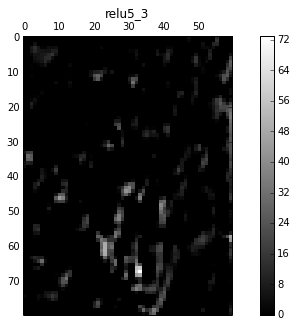

[35/36] conv5_4
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 80, 60, 512)


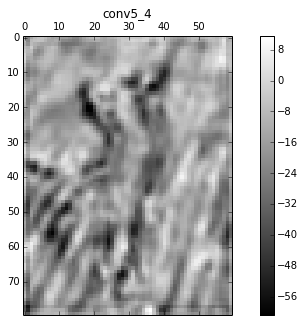

[36/36] relu5_4
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 80, 60, 512)


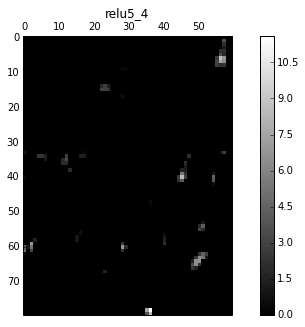

In [7]:
# run to load the vgg parameter
cwd  = os.getcwd()
VGG_PATH = cwd + "/imagenet-vgg-verydeep-19.mat"
with tf.Graph().as_default(), tf.Session() as sess:
    with tf.device("/cpu:0"):
        img_placeholder = tf.placeholder(tf.float32, shape=(None, 112, 112, 3))
        net_val, mean_pixel = net(VGG_PATH, img_placeholder)
        train_features = net_val['relu5_4'].eval(feed_dict={img_placeholder: trainimg_tensor})
        test_features = net_val['relu5_4'].eval(feed_dict={img_placeholder: testimg_tensor})
print ("TYPE OF 'train_features' IS %s" % (type(train_features)))
print ("SHAPE OF 'train_features' IS %s" % (train_features.shape,))
print ("TYPE OF 'test_features' IS %s" % (type(test_features)))
print ("SHAPE OF 'test_features' IS %s" % (test_features.shape,))
print("PREPROCESSING DONE")